# Calculating Beta Values and Generating Meta Features 

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors 
from scipy.spatial import distance

### Importing Meta-Dataset

In [2]:
dataset = pd.read_csv('./meta-dataset.csv')
dataset = dataset.iloc[:,1:]
dataset 

,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,label
0,0.116358,0.134907,0.278246,0.470489,0.0,0.0,0.0,0.0,1
1,0.096939,0.210459,0.269133,0.423469,0.0,0.0,0.0,0.0,1
2,0.067696,0.157957,0.483373,0.290974,0.0,0.0,0.0,0.0,1
3,0.085299,0.132486,0.328494,0.453721,0.0,0.0,0.0,0.0,1
4,0.026059,0.262215,0.288274,0.423453,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
221,0.000000,0.335975,0.664025,0.000000,0.0,0.0,0.0,0.0,1
222,0.000000,0.322368,0.677632,0.000000,0.0,0.0,0.0,0.0,1
223,0.062405,0.138508,0.512938,0.286149,0.0,0.0,0.0,0.0,1
224,0.001678,0.318792,0.677852,0.001678,0.0,0.0,0.0,0.0,1


In [3]:
features = dataset.iloc[:,:-1]
features

,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7
0,0.116358,0.134907,0.278246,0.470489,0.0,0.0,0.0,0.0
1,0.096939,0.210459,0.269133,0.423469,0.0,0.0,0.0,0.0
2,0.067696,0.157957,0.483373,0.290974,0.0,0.0,0.0,0.0
3,0.085299,0.132486,0.328494,0.453721,0.0,0.0,0.0,0.0
4,0.026059,0.262215,0.288274,0.423453,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
221,0.000000,0.335975,0.664025,0.000000,0.0,0.0,0.0,0.0
222,0.000000,0.322368,0.677632,0.000000,0.0,0.0,0.0,0.0
223,0.062405,0.138508,0.512938,0.286149,0.0,0.0,0.0,0.0
224,0.001678,0.318792,0.677852,0.001678,0.0,0.0,0.0,0.0


In [4]:
labels = dataset.iloc[:,-1]
labels 

0      1
1      1
2      1
3      1
4      1
      ..
221    1
222    1
223    1
224    1
225    1
Name: label, Length: 226, dtype: int64

#### <u>Calculating the value of U<sub>y<sub>i</sub></sub> for all sample points present in the dataset</u>

The expression for calculating U<sub>y<sub>i</sub></sub> is as given below:

<center><img src="./Images/formula_1.png"></center>

### Explaination of the above formula
* What the above formula is trying to convey is that of a given sample point <**x<sub>i</sub>**, y<sub>i</sub>>, we need to find the total number of sample points with the which  have the same the label value as y<sub>i</sub>. It is important to note that this total is not inclusive of the sample point <**x<sub>i</sub>**, y<sub>i</sub>>.

* To make things simpler, instead of constructing a function that takes in each sample point and calculates the U<sub>y<sub>i</sub></sub> seperately, we can just calculate the total of number of samples from each class and subtract one from the total for each respective class. Once this is done we can then plug in the values of ***U*** for each respective class label in the subsequent formulae that require us to iterate through each point.

#### Counting the number of values for each class

In [5]:
numValuesClass0 = dataset['label'].value_counts()[0]
numValuesClass1 = dataset['label'].value_counts()[1]
numValuesClass2 = dataset['label'].value_counts()[2]

print(f'The number of values in Class-0 = {numValuesClass0}')
print(f'The number of values in Class-1 = {numValuesClass1}')
print(f'The number of values in Class-2 = {numValuesClass2}')

The number of values in Class-0 = 20
The number of values in Class-1 = 148
The number of values in Class-2 = 58


#### Calculating the U<sub>y<sub>i</sub></sub> for each of the respective classes 

In [6]:
uValueClass0 = numValuesClass0 - 1
uValueClass1 = numValuesClass1 - 1
uValueClass2 = numValuesClass2 - 1

print(f'The U value in Class-0 = {uValueClass0}')
print(f'The U value in Class-1 = {uValueClass1}')
print(f'The U value in Class-2 = {uValueClass2}')

The U value in Class-0 = 19
The U value in Class-1 = 147
The U value in Class-2 = 57


In [7]:
uValuesDictionary = {
0: uValueClass0,
1: uValueClass1,
2: uValueClass2
}

print(uValuesDictionary)

{0: 19, 1: 147, 2: 57}


### <u>Calculating the nearest neighbours of the sample point<**x<sub>i</sub>**, y<sub>i</sub>> using the N(<**x<sub>i</sub>**, y<sub>i</sub>>, U<sub>y<sub>i</sub></sub>) expression</u>

The expression for calculating the nearest neighbours for a given sample point <**x<sub>i</sub>**, y<sub>i</sub>> is shown below:

<center><img src="./Images/formula_2.png"></center>

The resultant set that is generated from the expression contains a list of all sample points that are present in the the meta-dataset, but their a euclidian distance from the sample point <**x<sub>i</sub>**, y<sub>i</sub>> must be greater than than the euclidean distance between <**x<sub>i</sub>**, y<sub>i</sub>> and the U<sub>y<sub>i</sub></sub>-th sample point.

In [8]:
class NearestNeigbourCalculator:
    def __init__(self, rowVector, idx):
        self.samplePoint = rowVector
        self.idx = idx
        self.classification = rowVector[-1]
        self.distanceFromSamplePoints = {}
        self.nearestNeighbourIndecies = None
        self.nearestNeighboursSamplePoints = []
        self.nearestNeighboursLabels = []
        
    def calculateEuclideanDistance1(self,samplePoint):
        resultantEuclideanDistance = distance.euclidean(self.samplePoint[:-1], samplePoint[:-1])
        return resultantEuclideanDistance
    
    def calculateEuclideanDistance2(self, samplePoint1, samplePoint2):
        resultantEuclideanDistance = distance.euclidean(samplePoint1[:-1], samplePoint2[:-1])
        return resultantEuclideanDistance
    
    def calculatDistanceFromAllSamplePoints(self):
        for samplePoint in dataset.to_numpy():
            if not np.array_equal(samplePoint, self.samplePoint):
                calculatedDistance = self.calculateEuclideanDistance1(samplePoint)
                self.distanceFromSamplePoints[calculatedDistance] = samplePoint
    
    def calculateNearestNeighbours(self):
        nearestNeighborAlgorithm = NearestNeighbors(n_neighbors=uValuesDictionary[self.classification])
        nearestNeighborAlgorithm.fit(features)
        self.nearestNeighbourIndices = nearestNeighborAlgorithm.kneighbors([self.samplePoint[:-1]], return_distance=False)[0]
        for idx in self.nearestNeighbourIndices: 
            self.nearestNeighboursSamplePoints.append(features.iloc[idx,:])
            self.nearestNeighboursLabels.append(labels[idx])
            
    def getSetOfNearestNeighbours(self):
        self.calculatDistanceFromAllSamplePoints()
        self.calculateNearestNeighbours()
        return self.nearestNeighboursSamplePoints, self.nearestNeighboursLabels

### <u>Calculating the Beta Value for a given sample point <**x<sub>i</sub>**, y<sub>i</sub>></u>

For a given rowVector <**x<sub>i</sub>**, y<sub>i</sub>></u>, the Beta-value can be derived for the respective sample point with the help of the following expression: 

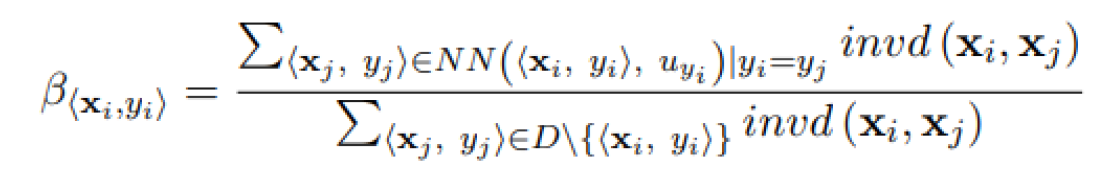

The formula for calculating the inverse distance between two points **x<sub>i</sub>** and **x<sub>j</sub>**. 

In [9]:
class BetaValueCalculator:
    def __init__(self, rowVector, idx):
        self.samplePoint = rowVector
        self.idx = idx
        self.nearestNeighbourCalculator = NearestNeigbourCalculator(rowVector, idx)
        self.numeratorSum = 0
        self.denomenatorSum = 0
        
    def calculateInverseDistance(self, samplePoint):
        resultantVectorNorm = distance.euclidean(self.samplePoint[:-1], samplePoint)
        denomenatorResult = 1 + resultantVectorNorm
        resultantInverseDistance = 1 / denomenatorResult 
        return resultantInverseDistance
    
    def calculateNumeratorExpression(self):
        listOfNearestNeighbourSamplePoints, listOfNearestNeighbourLabels = self.nearestNeighbourCalculator.getSetOfNearestNeighbours()
        for idx in range(len(listOfNearestNeighbourSamplePoints)):
            if np.array_equal(self.samplePoint[-1],listOfNearestNeighbourLabels[idx]):
                inverseDistanceResult = self.calculateInverseDistance(listOfNearestNeighbourSamplePoints[idx])
                self.numeratorSum += inverseDistanceResult
        
    def calculateDenomenatorExpression(self):
        for samplePoint in dataset.to_numpy():
            if not np.array_equal(samplePoint, self.samplePoint):
                calculatedInverseDistance = self.calculateInverseDistance(samplePoint[:-1])
                self.denomenatorSum += calculatedInverseDistance
    
    def calculateBetaValue(self):
        self.calculateNumeratorExpression()
        self.calculateDenomenatorExpression()
        resultantBetaValue = self.numeratorSum / self.denomenatorSum
        return resultantBetaValue

### <u>Generating list of Beta-values for all sample points in the dataset</u>

In [10]:
listOfBetaValues = []
dataset_numpy = dataset.to_numpy()
for idx, samplePoint in enumerate(dataset_numpy):
    betaValueCalcultor = BetaValueCalculator(samplePoint,idx)
    betaValue = betaValueCalcultor.calculateBetaValue()
    listOfBetaValues.append(betaValue)
print(listOfBetaValues)

/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names

[0.5306710880317372, 0.528619372092841, 0.5305499940411412, 0.5285879476410824, 0.5189322541114837, 0.5240044947386749, 0.5022676005767774, 0.5208825819033476, 0.5268110993500884, 0.5239351507258337, 0.5328472092697721, 0.5243210208104538, 0.12728270036544073, 0.0429500458457075, 0.5165862122626678, 0.5239017515517694, 0.5265051925307741, 0.517562023360968, 0.5169290868394997, 0.5205793997712369, 0.5168272430297804, 0.06695933719064348, 0.011826495551440342, 0.5247545100740956, 0.5297620712770033, 0.055457151052951674, 0.5150534648123459, 0.11539435455421145, 0.12123915810812072, 0.0891868188822487, 0.5155071302782103, 0.058511677670526854, 0.5139115946626657, 0.11615172983114501, 0.5255490106579311, 0.5055884189002239, 0.5261493819573904, 0.0062952672788371055, 0.03250441454995374, 0.5169070357849519, 0.5302368557172568, 0.5160986373622047, 0.5203850795223294, 0.5218835992239268, 0.52167464249072, 0.52063971372709, 0.5161964768544708, 0.04938092134753446, 0.5298786896427977, 0.0117572

/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/shreyaskumar/miniforge3/envs/shreyas_ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names

In [11]:
listOfBetaValues.sort()
print(listOfBetaValues)
print(f'lennth of listOfBetaValues = {len(listOfBetaValues)}')

[0.0062952672788371055, 0.006598006894649783, 0.006657157905530088, 0.006739081928051039, 0.006928809944543973, 0.011495714860575164, 0.01164956321986652, 0.011732162705948419, 0.011757267359040634, 0.011826495551440342, 0.012593710817617959, 0.013551896696596573, 0.022087655799028716, 0.022713236135596875, 0.02276338872576809, 0.026840395363614655, 0.03250441454995374, 0.03316820129474208, 0.033175313985086496, 0.0340522569245474, 0.034056758694770754, 0.03409179813271248, 0.03416798751910117, 0.03421742283159741, 0.03977310432752498, 0.0429500458457075, 0.04938092134753446, 0.05013604114560089, 0.051004309071743414, 0.051054459211470206, 0.05112458083168865, 0.055457151052951674, 0.058511677670526854, 0.06257187464093815, 0.06650579525341667, 0.06695933719064348, 0.06998270834966139, 0.07143318620709033, 0.07199380470606982, 0.07202568889043648, 0.07216167282516694, 0.07230965805084023, 0.07244831187431751, 0.0724582653202915, 0.07579626662996565, 0.07596281943289507, 0.0759783803729

### <u>Generation of Meta-Features</u>

The meta features of a dataset are created by group all of the calulated beta values into repective bins. For the case of our dataset we will be generating 8 training features which will correspond to 8 bins. We will represent all the bins as an array, where each index represents a bin number. 

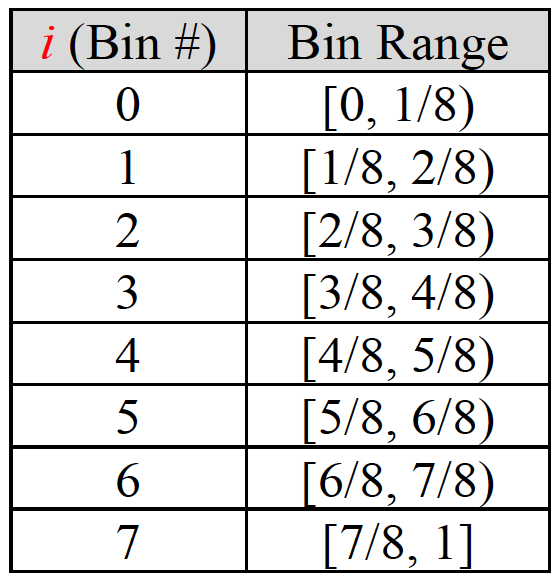

In [12]:
bins = {0: 0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}

for bValue in listOfBetaValues:
    if bValue>= 0 and bValue < 1/8:
        bins[0] += 1
    if bValue>= 1/8 and bValue < 2/8:
        bins[1] += 1
    if bValue>= 2/8 and bValue < 3/8:
        bins[2] += 1
    if bValue>= 3/8 and bValue < 4/8:
        bins[3] += 1
    if bValue>= 4/8 and bValue < 5/8:
        bins[4] += 1
    if bValue>= 5/8 and bValue < 6/8:
        bins[5] += 1
    if bValue>= 6/8 and bValue < 7/8:
        bins[6] += 1
    if bValue>= 7/8 and bValue <= 1:
        bins[7] += 1

normalized_bin_values = [bins[i]/226 for i in range(8)]

In [13]:
normalized_bin_values

[0.33185840707964603,
 0.01327433628318584,
 0.0,
 0.12389380530973451,
 0.5309734513274337,
 0.0,
 0.0,
 0.0]